Data Cleaning and Preprocessing

In [2]:
import pandas as pd
import numpy as np

In [3]:
sdf = pd.read_csv("C:\\Users\\workl\\Desktop\\Study\\245\\TermProject\\spotify_dataset.csv")
sdf.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [4]:
print(sdf.columns)

Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')


In [29]:
# Rename 'Release Date' column to 'Release Year' and extract only the year
sdf['Release Year'] = sdf['Release Date'].str.split('/').str[-1]

# Drop specified columns
sdf.drop(columns=['Highest Charting Position', 'Number of Times Charted', 
                  'Week of Highest Charting', 'Song ID', 'Weeks Charted', 'Release Date', 'Chord', 'Artist Followers'], inplace=True)


# Print updated DataFrame with renamed column and extracted year
print(sdf)

      Index                           Song Name   Streams  \
0         1                             Beggin'  48633449   
1         2           STAY (with Justin Bieber)  47248719   
2         3                            good 4 u  40162559   
3         4                          Bad Habits  37799456   
4         5   INDUSTRY BABY (feat. Jack Harlow)  33948454   
...     ...                                 ...       ...   
1551   1552                           New Rules   4630675   
1552   1553                  Cheirosa - Ao Vivo   4623030   
1553   1554           Havana (feat. Young Thug)   4620876   
1554   1555          Surtada - Remix Brega Funk   4607385   
1555   1556  Lover (Remix) [feat. Shawn Mendes]   4595450   

                             Artist       Genre  Popularity  Danceability  \
0                          Måneskin        Rock       100.0          68.0   
1                     The Kid LAROI        Rock        99.0          53.0   
2                    Olivia Rodrigo 

In [5]:
print(sdf['Genre'].unique())

["['indie rock italiano', 'italian pop']" "['australian hip hop']"
 "['pop']" "['pop', 'uk pop']" "['lgbtq+ hip hop', 'pop rap']"
 "['dance pop', 'pop']" "['puerto rican pop', 'trap latino']"
 "['latin', 'reggaeton', 'trap latino']" "['dance pop', 'pop', 'uk pop']"
 "['latin', 'reggaeton', 'reggaeton colombiano']"
 "['k-pop', 'k-pop boy group']" "['canadian pop', 'pop', 'post-teen pop']"
 "['canadian contemporary r&b', 'canadian pop', 'pop']"
 "['reggaeton', 'trap latino']"
 "['gauze pop', 'indietronica', 'shiver pop']"
 "['latin', 'latin hip hop', 'reggaeton', 'trap latino']"
 "['dfw rap', 'melodic rap', 'rap']"
 "['dance pop', 'house', 'pop dance', 'tropical house', 'uk dance']"
 "['dance pop', 'pop', 'post-teen pop']"
 "['dance pop', 'electropop', 'pop', 'post-teen pop']"
 "['colombian pop', 'latin', 'reggaeton', 'reggaeton colombiano']"
 "['pop', 'post-teen pop']" ' ' "['chicago rap']"
 "['latin', 'panamanian pop', 'reggaeton', 'trap latino']"
 "['latin pop', 'pop argentino']"
 "['

Mapping the genres

In [30]:
genre_mapping = {
    'Electronic': ['edm', 'electro house', 'electropop', 'indietronica', 'metropopolis', 'moombahton', 'progressive electro house', 'slap house', 'tropical house'],
    'Folk': ['afroswing', 'banda', 'chill r&b', 'corrido', 'dembow', 'jawaiian', 'minnesota hip hop', 'neo mellow', 'norteno', 'sertanejo pop', 'sertanejo universitario', 'trap brasileiro', 'trap italiana', 'venezuelan hip hop'],
    'Funk/Soul': ['disco', 'funk', 'jazz funk', 'motown', 'quiet storm', 'soul'],
    'Hip Hop': ['atl hip hop', 'belgian hip hop', 'cali rap', 'canadian hip hop', 'chicago drill', 'chicago rap', 'conscious hip hop', 'dmv rap', 'emo rap', 'florida rap', 'gangster rap', 'grime', 'hip hop', 'italian hip hop', 'k-pop', 'k-rap', 'memphis hip hop', 'modern rock', 'new orleans rap', 'philly rap', 'pittsburgh rap', 'pop rap', 'rap', 'reggae', 'southern hip hop', 'trap', 'trap chileno', 'trap colombiano', 'trap dominicano', 'trap latino', 'trap queen', 'turkish trap', 'uk hip hop', 'vapor trap'],
    'Jazz': ['jazz'],
    'Latin': ['brega funk', 'colombian pop', 'dembow', 'latin', 'latin hip hop', 'latin pop', 'meme rap', 'perreo', 'puerto rican pop', 'reggaeton', 'reggaeton colombiano', 'reggaeton flow', 'trap latino', 'venezuelan hip hop'],
    'Pop': ['acoustic pop', 'afroswing', 'alt z', 'dance pop', 'electropop', 'escape room', 'indie cafe pop', 'indie pop', 'indie rockism', 'italian hip hop', 'modern indie pop', 'modern rock', 'neo mellow', 'pop', 'pop dance', 'pop edm', 'pop reggaeton', 'pop rock', 'pop urbaine', 'post-teen pop', 'r&b', 'sertanejo pop', 'sertanejo universitario', 'social media pop', 'swedish pop', 'uk pop', 'urban contemporary'],
    'Reggae': ['reggae'],
    'Rock': ['album rock', 'alternative pop rock', 'alternative r&b', 'atl hip hop', 'atl trap', 'boy band', 'deep german hip hop', 'electro house', 'francoton', 'french hip hop', 'german hip hop', 'hard rock', 'hip hop', 'indie rockism', 'modern alternative rock', 'modern rock', 'mellow gold', 'new wave pop', 'pop rock', 'punk rock', 'rock', 'soft rock', 'southern hip hop', 'urban contemporary']
}

In [31]:
def map_genre(keywords):
    genres = []
    for keyword in keywords.split(","):
        matched_genres = [genre for genre, keywords_list in genre_mapping.items() if any(kw.strip().lower() in keyword.lower() for kw in keywords_list)]
        if matched_genres:
            genres.extend(matched_genres)
    return list(set(genres))

In [32]:
sdf['Genre'] = sdf['Genre'].apply(map_genre)
sdf

,Index,Song Name,Streams,Artist,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Duration (minutes),Release Year
0,1,Beggin',48633449,Måneskin,[Rock],100.0,68.0,81.0,76.0,3.0,13.0,36.0,134.002,59.0,3.53,2017-12-08
1,2,STAY (with Justin Bieber),47248719,The Kid LAROI,[Rock],99.0,53.0,78.0,74.0,3.0,4.0,9.0,169.928,47.0,2.36,2021-07-09
2,3,good 4 u,40162559,Olivia Rodrigo,[Pop],99.0,50.0,67.0,75.0,15.0,34.0,7.0,166.928,69.0,2.97,2021-05-21
3,4,Bad Habits,37799456,Ed Sheeran,[Pop],98.0,79.0,92.0,80.0,1.0,5.0,37.0,126.026,59.0,3.85,2021-06-25
4,5,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,[Rock],96.0,71.0,71.0,67.0,4.0,2.0,3.0,149.995,91.0,3.53,2021-07-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,New Rules,4630675,Dua Lipa,[Pop],79.0,74.0,71.0,72.0,5.0,0.0,14.0,116.073,61.0,3.49,2017-06-02
1552,1553,Cheirosa - Ao Vivo,4623030,Jorge & Mateus,[],66.0,46.0,89.0,83.0,7.0,24.0,33.0,152.370,72.0,3.03,2019-10-11
1553,1554,Havana (feat. Young Thug),4620876,Camila Cabello,[],81.0,74.0,51.0,78.0,1.0,19.0,12.0,104.988,38.0,3.62,2018-01-12
1554,1555,Surtada - Remix Brega Funk,4607385,"Dadá Boladão, Tati Zaqui, OIK",[Funk/Soul],60.0,82.0,54.0,68.0,4.0,25.0,17.0,154.064,90.0,2.55,2019-09-25


In [33]:
empty_genre_rows = sdf[sdf['Genre'].apply(lambda x: len(x) == 0)]

# Print the filtered rows
print(empty_genre_rows.count())

Index                 103
Song Name             103
Streams               103
Artist                103
Genre                 103
Popularity            103
Danceability          103
Energy                103
Loudness              103
Speechiness           103
Acousticness          103
Liveness              103
Tempo                 103
Valence               103
Duration (minutes)    103
Release Year          103
dtype: int64


In [34]:
# Filter the DataFrame for rows where Genre is an empty list
empty_genre_artists = sdf[sdf['Genre'].apply(len) == 0]['Artist']

# Count occurrences of each artist
artist_counts = empty_genre_artists.value_counts()

# Print the count of each artist
print(artist_counts)

Artist
Morgan Wallen                            7
Camila Cabello                           4
Lauv                                     4
Halsey                                   4
Jorge & Mateus                           3
                                        ..
Anne-Marie, KSI, Digital Farm Animals    1
Riton, Nightcrawlers                     1
Jonas Esticado                           1
Lauv, Conan Gray                         1
SHAED, ZAYN                              1
Name: count, Length: 76, dtype: int64


In [35]:
# Set genre for Pop Smoke
sdf.loc[sdf['Artist'] == 'Pop Smoke', 'Genre'] = 'Hip Hop'

# Set genres for Billie Eilish
sdf.loc[sdf['Artist'] == 'Billie Eilish', 'Genre'] = 'Electronic, Pop'

# Set genres for Tame Impala
sdf.loc[sdf['Artist'] == 'Tame Impala', 'Genre'] = 'Pop, Rock'

# Set genres for Frank Sinatra
sdf.loc[sdf['Artist'] == 'Frank Sinatra', 'Genre'] = 'Pop, Jazz'

sdf.loc[sdf['Artist'] == 'Morgan Wallen', 'Genre'] = 'Folk'

sdf.loc[sdf['Artist'].isin(['Ariana Grande', 'Justin Bieber', 'Dua Lipa']), 'Genre'] = 'Pop'

sdf.head()

,Index,Song Name,Streams,Artist,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Duration (minutes),Release Year
0,1,Beggin',48633449,Måneskin,[Rock],100.0,68.0,81.0,76.0,3.0,13.0,36.0,134.002,59.0,3.53,2017-12-08
1,2,STAY (with Justin Bieber),47248719,The Kid LAROI,[Rock],99.0,53.0,78.0,74.0,3.0,4.0,9.0,169.928,47.0,2.36,2021-07-09
2,3,good 4 u,40162559,Olivia Rodrigo,[Pop],99.0,50.0,67.0,75.0,15.0,34.0,7.0,166.928,69.0,2.97,2021-05-21
3,4,Bad Habits,37799456,Ed Sheeran,[Pop],98.0,79.0,92.0,80.0,1.0,5.0,37.0,126.026,59.0,3.85,2021-06-25
4,5,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,[Rock],96.0,71.0,71.0,67.0,4.0,2.0,3.0,149.995,91.0,3.53,2021-07-23


In [36]:
# Filter the DataFrame for rows where Genre is an empty list
empty_genre_artists = sdf[sdf['Genre'].apply(len) == 0]['Artist']

# Count occurrences of each artist
artist_counts = empty_genre_artists.value_counts()

# Print the count of each artist
print(artist_counts)

Artist
Camila Cabello                           4
Lauv                                     4
Halsey                                   4
Jorge & Mateus                           3
Martin Garrix                            3
                                        ..
Anne-Marie, KSI, Digital Farm Animals    1
Riton, Nightcrawlers                     1
Jonas Esticado                           1
Lauv, Conan Gray                         1
SHAED, ZAYN                              1
Name: count, Length: 75, dtype: int64


In [37]:
# Filter rows where the genre is not an empty list
sdf = sdf[sdf['Genre'].apply(lambda x: len(x) > 0)]

# Print the updated DataFrame to verify the changes
print(sdf)


      Index                             Song Name   Streams  \
0         1                               Beggin'  48633449   
1         2             STAY (with Justin Bieber)  47248719   
2         3                              good 4 u  40162559   
3         4                            Bad Habits  37799456   
4         5     INDUSTRY BABY (feat. Jack Harlow)  33948454   
...     ...                                   ...       ...   
1549   1550  Let Me Know (I Wonder Why Freestyle)   4701532   
1550   1551                        Ne reviens pas   4676857   
1551   1552                             New Rules   4630675   
1554   1555            Surtada - Remix Brega Funk   4607385   
1555   1556    Lover (Remix) [feat. Shawn Mendes]   4595450   

                             Artist            Genre  Popularity  \
0                          Måneskin           [Rock]       100.0   
1                     The Kid LAROI           [Rock]        99.0   
2                    Olivia Rodrigo    

In [38]:
empty_genre_artists = sdf[sdf['Genre'].apply(len) == 0]['Artist']

# Count occurrences of each artist
artist_counts = empty_genre_artists.value_counts()

# Print the count of each artist
print(artist_counts)

Series([], Name: count, dtype: int64)


In [39]:
sdf = sdf[sdf['Song Name'] != '34+35 Remix (feat. Doja Cat, Megan Thee Stallion) - Remix']

In [40]:
print("Summary Statistics:")
print(sdf.describe())

print("\nInformation about DataFrame:")
print(sdf.info())

Summary Statistics:
             Index       Streams   Popularity  Danceability       Energy  \
count  1355.000000  1.355000e+03  1355.000000   1355.000000  1355.000000   
mean    792.068635  6.418215e+06    71.088561     65.535793    62.763100   
std     445.903819  3.533845e+06    12.574956     17.302953    17.486373   
min       1.000000  4.176083e+06     0.000000      0.000000     0.000000   
25%     408.500000  4.923200e+06    65.000000     54.500000    52.000000   
50%     803.000000  5.300884e+06    73.000000     68.000000    64.000000   
75%    1178.500000  6.563624e+06    79.000000     79.000000    75.000000   
max    1556.000000  4.863345e+07   100.000000    100.000000   100.000000   

          Loudness  Speechiness  Acousticness     Liveness        Tempo  \
count  1355.000000  1355.000000   1355.000000  1355.000000  1355.000000   
mean     70.313653    12.407380     24.623616    17.050923   122.840430   
std       9.476929    13.224321     25.420657    15.001711    29.92035

In [41]:
sdf['Genre'] = sdf['Genre'].apply(lambda x: [x] if not isinstance(x, list) else x)

In [42]:
columns_to_convert = ['Streams']
sdf[columns_to_convert] = sdf[columns_to_convert].replace('[,\s]', '', regex=True).astype('int64')
print("\nInformation about DataFrame:")
print(sdf.info())


Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 1355 entries, 0 to 1555
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               1355 non-null   int64  
 1   Song Name           1355 non-null   object 
 2   Streams             1355 non-null   int64  
 3   Artist              1355 non-null   object 
 4   Genre               1355 non-null   object 
 5   Popularity          1355 non-null   float64
 6   Danceability        1355 non-null   float64
 7   Energy              1355 non-null   float64
 8   Loudness            1355 non-null   float64
 9   Speechiness         1355 non-null   float64
 10  Acousticness        1355 non-null   float64
 11  Liveness            1355 non-null   float64
 12  Tempo               1355 non-null   float64
 13  Valence             1355 non-null   float64
 14  Duration (minutes)  1355 non-null   float64
 15  Release Year        1355 non-n

In [43]:
for index, row in sdf.iterrows():
    try:
        int_value = int(row['Popularity'])
    except ValueError:
        print("Error occurred at index:", index)
        print("Row:", row)

In [44]:
sdf = sdf[sdf['Song Name'] != '34+35']

In [45]:
columns_to_convert = ['Streams', 'Popularity']

# Remove commas and spaces from the specified columns and then convert to int64
sdf[columns_to_convert] = sdf[columns_to_convert].replace('[,\s]', '', regex=True).astype('int64')

In [46]:
columns_to_convert = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence']
sdf[columns_to_convert] = sdf[columns_to_convert].astype(float)

KeyError: "['Duration (ms)'] not in index"

In [47]:
print("\nInformation about DataFrame:")
print(sdf.info())


Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 1355 entries, 0 to 1555
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               1355 non-null   int64  
 1   Song Name           1355 non-null   object 
 2   Streams             1355 non-null   int64  
 3   Artist              1355 non-null   object 
 4   Genre               1355 non-null   object 
 5   Popularity          1355 non-null   int64  
 6   Danceability        1355 non-null   float64
 7   Energy              1355 non-null   float64
 8   Loudness            1355 non-null   float64
 9   Speechiness         1355 non-null   float64
 10  Acousticness        1355 non-null   float64
 11  Liveness            1355 non-null   float64
 12  Tempo               1355 non-null   float64
 13  Valence             1355 non-null   float64
 14  Duration (minutes)  1355 non-null   float64
 15  Release Year        1355 non-n

Normalizing Loudness

In [48]:
# Normalize Loudness from -60 dB to 0 dB to the range from 0 to 1
sdf['Loudness'] = (sdf['Loudness'] + 60) / 60

In [49]:
sdf['Genre'] =  sdf['Genre'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

In [50]:
# Filter tuples where Popularity is less than 40
filtered_tuples = sdf[sdf['Popularity'] < 40]

# Print the filtered tuples
print(filtered_tuples)

      Index                              Song Name  Streams  \
65       66                        Don't Start Now  8821971   
83       84                             Love Again  7465445   
118     119                                Hold On  6300416   
164     165                                bad guy  5436286   
215     216                             Lost Cause  5203319   
285     286                                 Anyone  5079587   
308     309                         Therefore I Am  5265630   
377     378                    everything i wanted  5448680   
399     400                  when the party's over  5467596   
681     682  Mistletoe And Holly - Remastered 1999  7225080   
682     683         Jingle Bells - Remastered 1999  7182262   
687     688                      Winter Wonderland  6680928   
991     992                             ocean eyes  4476954   
1291   1292                             H <3 T E L  4701388   
1379   1380                          bury a friend  502

Normalizing Set

In [51]:
attributes_to_normalize = ['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 
                           'Acousticness', 'Liveness', 'Valence']

for attribute in attributes_to_normalize:
    min_val = sdf[attribute].min()
    max_val = sdf[attribute].max()
    sdf[attribute] = round(100 * (sdf[attribute] - min_val) / (max_val - min_val))

# Convert 'Duration (ms)' to 'Duration (minutes)'
sdf['Duration (minutes)'] = (sdf['Duration (ms)'] / 60000).round(2)

# Drop the original 'Duration (ms)' column
sdf.drop(columns=['Duration (ms)'], inplace=True)

# Print the modified DataFrame
print(sdf)

KeyError: 'Duration (ms)'

In [52]:
sdf['Release Year'].value_counts()

Release Year
2020-01-17    31
2020-02-14    27
2021-06-25    27
2020-12-11    27
2020-07-10    24
              ..
1984-11-29     1
2014-11-24     1
1964-10-19     1
1963-11-24     1
2019-09-25     1
Name: count, Length: 428, dtype: int64

In [53]:
# Assuming your main DataFrame is named 'df'
sdf['Release Year'] = sdf['Release Year'].str[:4].astype(int)

In [54]:
# Filter rows where the 'Release Year' column is in the range [2017, 2021]
valid_years = [2019, 2020, 2021]
sdf = sdf[sdf['Release Year'].isin(valid_years)]

In [55]:
year_counts = sdf['Release Year'].value_counts()
print(year_counts)

Release Year
2020    723
2021    312
2019    156
Name: count, dtype: int64


In [89]:
df2 = pd.read_csv("C:\\Users\\workl\\Desktop\\Study\\245\\TermProject\\songs_dataset_2000_2019.csv")

In [90]:
year_dtype = df2['year'].dtype
df2 = df2[(df2['year'] >= 2012) & (df2['year'] <= 2018)]

In [91]:
df2.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
29,Chicane,Don't Give Up,210786,False,2016,47,0.644,0.720,10,-9.635,0,0.0419,0.00145,0.504000,0.0839,0.530,132.017,Dance/Electronic
46,Samantha Mumba,Gotta Tell You,201946,False,2018,43,0.729,0.632,0,-8.750,0,0.0279,0.19100,0.000000,0.1660,0.774,109.981,pop
115,Faithless,We Come 1 - Radio Edit,222435,False,2015,53,0.645,0.903,5,-10.587,0,0.0441,0.00188,0.799000,0.1470,0.610,135.977,"pop, Dance/Electronic"
154,Usher,Pop Ya Collar - Radio Edit,210813,False,2016,26,0.888,0.800,5,-3.944,0,0.0946,0.09010,0.000021,0.2290,0.866,106.957,"hip hop, pop, R&B"
175,DB Boulevard,Point Of View - Radio Edit,231166,False,2018,0,0.676,0.715,6,-6.854,1,0.0287,0.00284,0.074600,0.0685,0.275,129.006,Dance/Electronic


In [92]:
sdf.columns

Index(['Song Name', 'Streams', 'Artist', 'Genre', 'Popularity', 'Danceability',
       'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness',
       'Tempo', 'Valence', 'Duration (minutes)', 'Release Year'],
      dtype='object')

In [93]:
df2.columns


Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [94]:
df2.columns = [col.capitalize() for col in df2.columns]

In [95]:
df2['Genre'] = df2['Genre'].str.split('/').str[0]
df2['Genre'] = df2['Genre'].str.split(',').str[0]

In [96]:
genre_mapping = {
    'Electronic': ['Dance'],
    'Pop': ['pop', 'R&B', 'set()'],
    'Hip Hop': 'hip hop',
    'Rock': ['rock', 'metal'],
    'Folk': ['country', 'Folk'],
    'Latin': 'latin'
}

# Function to map genres
def map_genre(genre):
    for key, value in genre_mapping.items():
        if isinstance(value, list):
            if genre.lower() in value:
                return key
        elif genre.lower() == value:
            return key
    return genre

# Apply the mapping function to the 'Genre' column
df2 = df2[df2['Genre'] != 'easy listening']
df2['Genre'] = df2['Genre'].apply(map_genre)
df2

,Artist,Song,Duration_ms,Explicit,Year,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
29,Chicane,Don't Give Up,210786,False,2016,47,0.644,0.720,10,-9.635,0,0.0419,0.00145,0.504000,0.0839,0.530,132.017,Dance
46,Samantha Mumba,Gotta Tell You,201946,False,2018,43,0.729,0.632,0,-8.750,0,0.0279,0.19100,0.000000,0.1660,0.774,109.981,Pop
115,Faithless,We Come 1 - Radio Edit,222435,False,2015,53,0.645,0.903,5,-10.587,0,0.0441,0.00188,0.799000,0.1470,0.610,135.977,Pop
154,Usher,Pop Ya Collar - Radio Edit,210813,False,2016,26,0.888,0.800,5,-3.944,0,0.0946,0.09010,0.000021,0.2290,0.866,106.957,Hip Hop
175,DB Boulevard,Point Of View - Radio Edit,231166,False,2018,0,0.676,0.715,6,-6.854,1,0.0287,0.00284,0.074600,0.0685,0.275,129.006,Dance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,Khalid,Better,229412,False,2018,70,0.442,0.585,0,-10.332,0,0.0964,0.09840,0.391000,0.1400,0.116,97.565,Pop
1966,Blueface,Thotiana,129264,True,2018,1,0.906,0.382,10,-12.890,0,0.2690,0.18000,0.000000,0.1130,0.391,104.025,Hip Hop
1977,Dominic Fike,3 Nights,177666,False,2018,78,0.815,0.518,7,-6.594,0,0.0897,0.22300,0.000000,0.1040,0.877,151.891,Rock
1984,Post Malone,Better Now,231266,True,2018,80,0.680,0.578,10,-5.804,1,0.0400,0.33100,0.000000,0.1350,0.341,145.038,Hip Hop


In [97]:
attributes_to_normalize = ['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 
                           'Acousticness', 'Liveness', 'Valence']

for attribute in attributes_to_normalize:
    min_val = df2[attribute].min()
    max_val = df2[attribute].max()
    df2[attribute] = round(100 * (df2[attribute] - min_val) / (max_val - min_val))

# Convert 'Duration (ms)' to 'Duration (minutes)'
df2['Duration (minutes)'] = (df2['Duration_ms'] / 60000).round(2)

# Drop the original 'Duration (ms)' column
df2.drop(columns=['Duration_ms'], inplace=True)

# Print the modified DataFrame
df2.head()

,Artist,Song,Explicit,Year,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre,Duration (minutes)
29,Chicane,Don't Give Up,False,2016,53.0,59.0,72.0,10,56.0,0,4.0,0.0,0.504000,8.0,53.0,132.017,Dance,3.51
46,Samantha Mumba,Gotta Tell You,False,2018,48.0,70.0,62.0,0,61.0,0,1.0,20.0,0.000000,17.0,79.0,109.981,Pop,3.37
115,Faithless,We Come 1 - Radio Edit,False,2015,60.0,59.0,91.0,5,51.0,0,4.0,0.0,0.799000,15.0,62.0,135.977,Pop,3.71
154,Usher,Pop Ya Collar - Radio Edit,False,2016,29.0,90.0,80.0,5,85.0,0,14.0,10.0,0.000021,25.0,89.0,106.957,Hip Hop,3.51
175,DB Boulevard,Point Of View - Radio Edit,False,2018,0.0,63.0,71.0,6,70.0,1,1.0,0.0,0.074600,6.0,26.0,129.006,Dance,3.85


In [98]:
df2.drop('Instrumentalness', axis=1, inplace=True)

In [99]:
df2.drop('Explicit', axis=1, inplace=True)
df2.drop('Mode', axis=1, inplace=True)
df2.drop('Key', axis=1, inplace=True)

In [100]:
df2.rename(columns={'Year': 'Release Year'}, inplace=True)

In [101]:
df2.rename(columns={'Song': 'Song Name'}, inplace=True)

In [103]:
sdf.columns

Index(['Song Name', 'Streams', 'Artist', 'Genre', 'Popularity', 'Danceability',
       'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness',
       'Tempo', 'Valence', 'Duration (minutes)', 'Release Year'],
      dtype='object')

In [104]:
df2.columns

Index(['Artist', 'Song Name', 'Release Year', 'Popularity', 'Danceability',
       'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness',
       'Valence', 'Tempo', 'Genre', 'Duration (minutes)'],
      dtype='object')

In [105]:
sdf.drop('Streams', axis=1, inplace=True)

In [106]:
# Concatenate the datasets
df = pd.concat([sdf, df2], ignore_index=True)

# Sort the combined dataset by 'Release Year'
df = df.sort_values(by='Release Year')

# Add an index column
df['Index'] = range(1, len(df) + 1)

In [107]:
df.head()

,Song Name,Artist,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Duration (minutes),Release Year,Index
1338,I Could Be The One (Avicii Vs. Nicky Romero) -...,Avicii,Pop,76.0,42.0,79.0,86.0,3.0,35.0,35.0,127.946,65.0,3.47,2012,1
1274,Faded,Tyga,Hip Hop,65.0,83.0,66.0,62.0,33.0,1.0,40.0,95.073,32.0,3.44,2012,2
1273,R.I.P. (feat. Tinie Tempah),Rita Ora,Hip Hop,52.0,54.0,83.0,88.0,5.0,3.0,76.0,72.022,34.0,3.80,2012,3
1272,As Long As You Love Me,Justin Bieber,Pop,75.0,50.0,88.0,88.0,15.0,9.0,41.0,139.691,62.0,3.82,2012,4
1271,Candy,Robbie Williams,Pop,76.0,68.0,79.0,72.0,4.0,4.0,6.0,116.043,91.0,3.35,2012,5


In [109]:
nan_values = df.isna().sum()
print(nan_values)

Song Name             0
Artist                0
Genre                 0
Popularity            0
Danceability          0
Energy                0
Loudness              0
Speechiness           0
Acousticness          0
Liveness              0
Tempo                 0
Valence               0
Duration (minutes)    0
Release Year          0
Index                 0
dtype: int64


Exploratory Data Analysis (Discuss with team)

In [58]:
data = df

# Display the first few rows of the dataset and some basic information
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1276 to 1999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               2000 non-null   int64  
 1   Song Name           1277 non-null   object 
 2   Streams             1277 non-null   float64
 3   Artist              1277 non-null   object 
 4   Genre               1277 non-null   object 
 5   Popularity          1277 non-null   float64
 6   Danceability        1277 non-null   float64
 7   Energy              1277 non-null   float64
 8   Loudness            1277 non-null   float64
 9   Speechiness         1277 non-null   float64
 10  Acousticness        1277 non-null   float64
 11  Liveness            1277 non-null   float64
 12  Tempo               1277 non-null   float64
 13  Valence             1277 non-null   float64
 14  Release Year        1277 non-null   float64
 15  Duration (minutes)  2000 non-null   float64
 16  artist  

(None,
       Index                             Song Name    Streams  \
 1276      1    Lover (Remix) [feat. Shawn Mendes]  4595450.0   
 1058      2                              Whine Up  5130783.0   
 1035      3  TOES (feat. Lil Baby & Moneybagg Yo)  4878903.0   
 255       4                                Golden  5298893.0   
 261       5           Boy With Luv (feat. Halsey)  5266625.0   
 
                    Artist Genre  Popularity  Danceability  Energy  Loudness  \
 1276         Taylor Swift   Pop        70.0          36.0    60.0      67.0   
 1058  Nicky Jam, Anuel AA  Rock        70.0          80.0    67.0      71.0   
 1035               DaBaby  Rock        73.0          80.0    58.0      79.0   
 255          Harry Styles   Pop        83.0          36.0    86.0      75.0   
 261                   BTS   Pop        82.0          60.0    88.0      77.0   
 
       Speechiness  ...  energy  key  loudness  mode  speechiness  \
 1276          5.0  ...     NaN  NaN       NaN   N

Histograms for numerical features

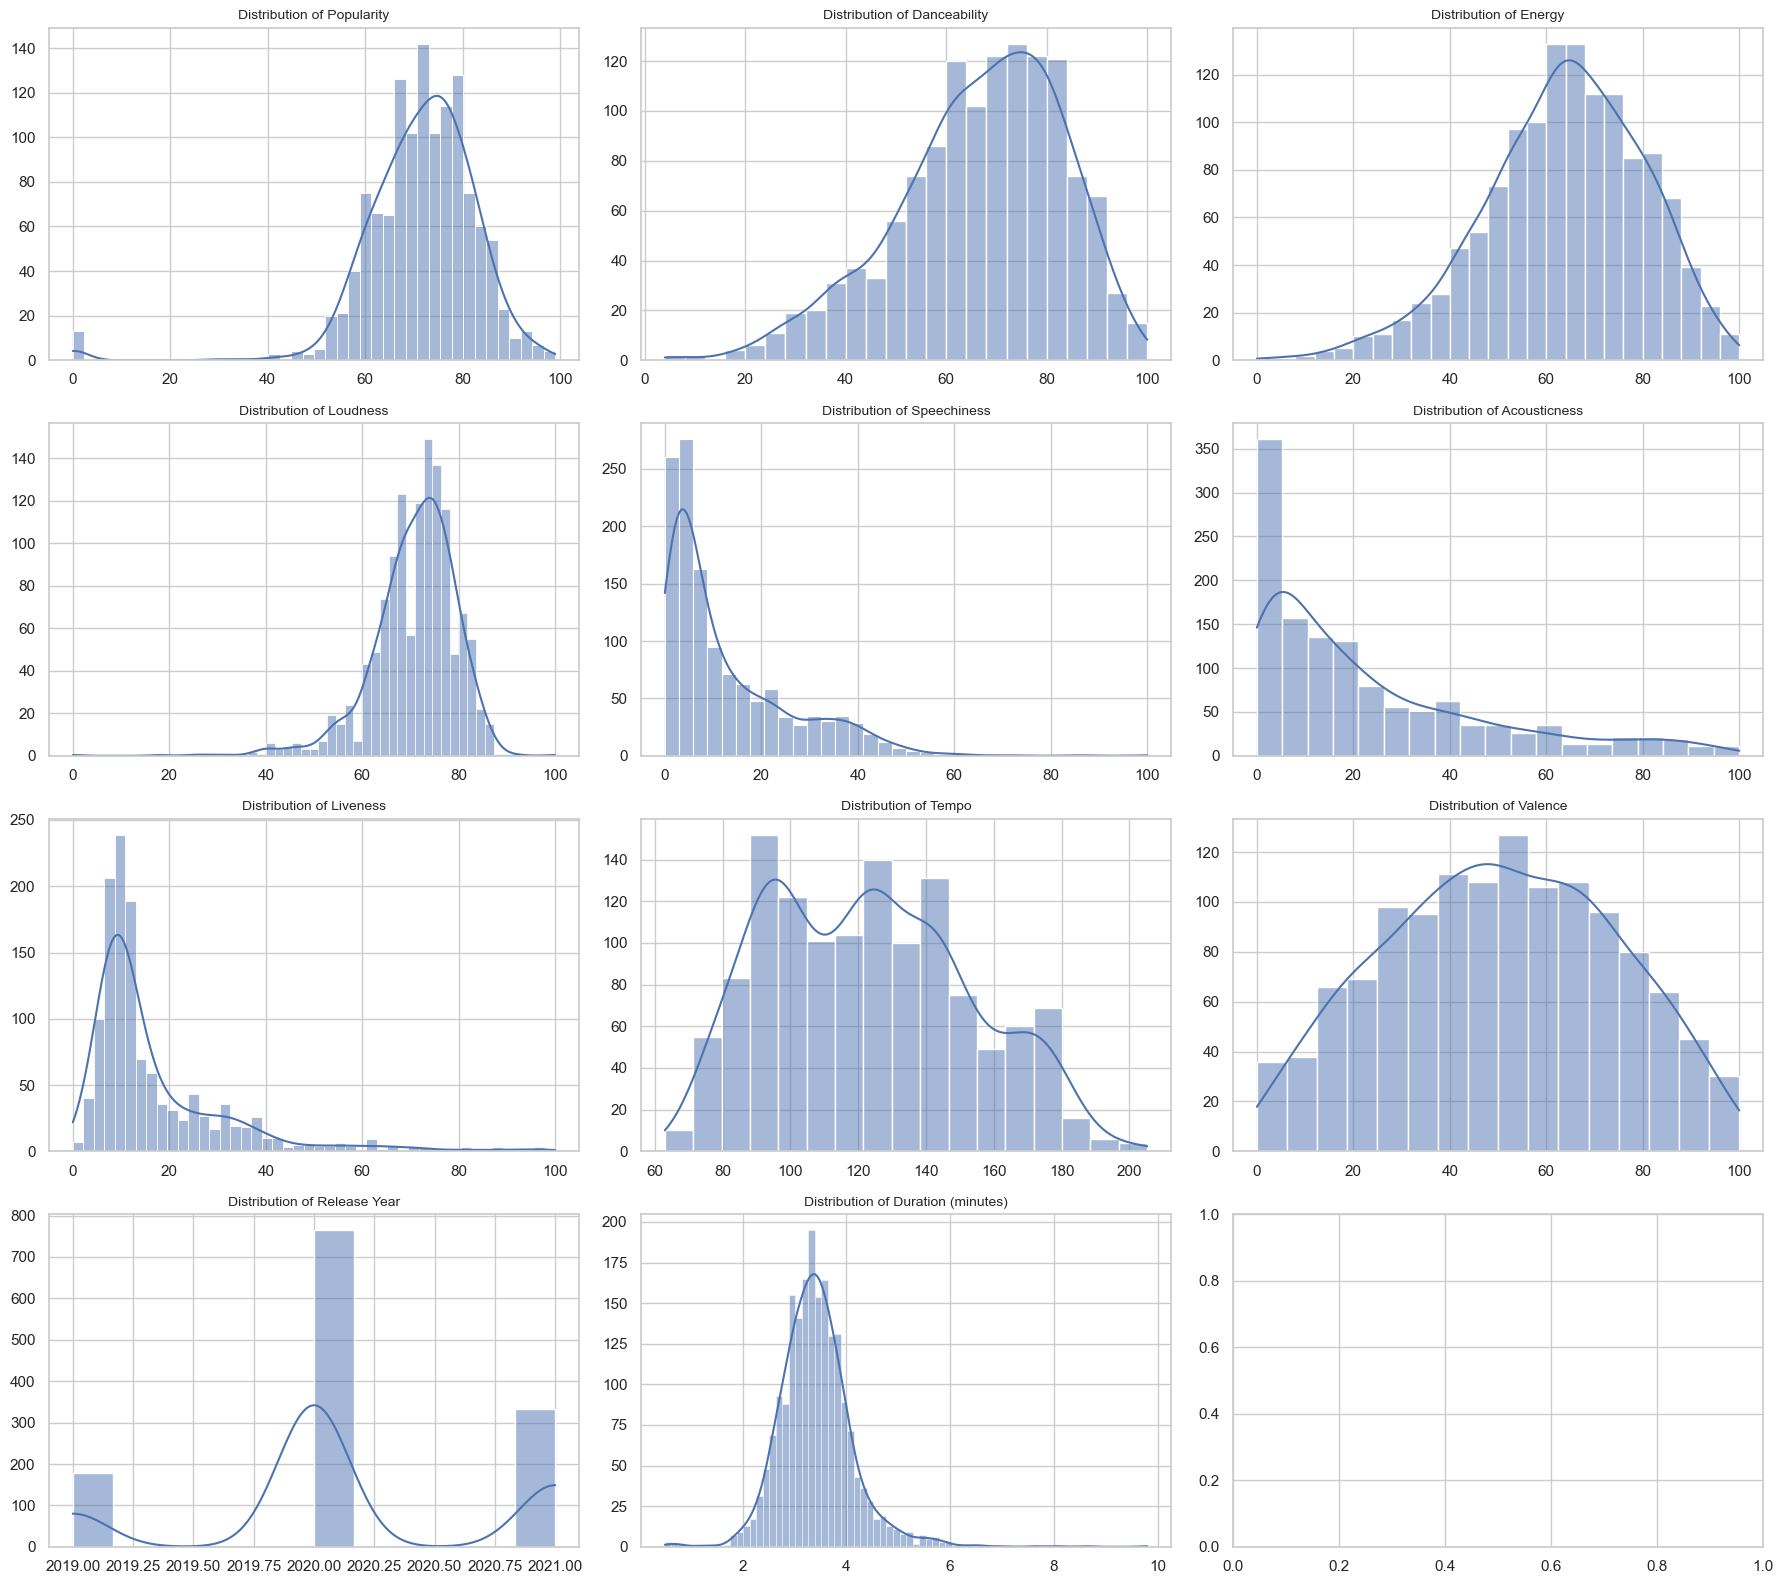

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))

# List of numerical columns for plotting
num_cols = ['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
            'Acousticness', 'Liveness', 'Tempo', 'Valence', 'Release Year', 'Duration (minutes)']

# Plot distribution of each numerical feature
for ax, col in zip(axes.flatten(), num_cols):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

Popularity, Danceability, Energy, Loudness, and Valence have relatively broad distributions, indicating a variety of values across songs.
Speechiness, Acousticness, and Liveness show skewed distributions, with most values clustering near lower ends, suggesting these characteristics are less pronounced in most songs.
Tempo is more evenly distributed but has a noticeable concentration in specific ranges, likely corresponding to common tempos for popular songs.
Release Year shows concentration in certain periods, possibly reflecting the dataset's focus on more recent songs or specific years with more releases.
Duration (minutes) also shows a skewed distribution with most songs falling into a typical length for pop tracks, with fewer longer or shorter outliers.

c:\Users\workl\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


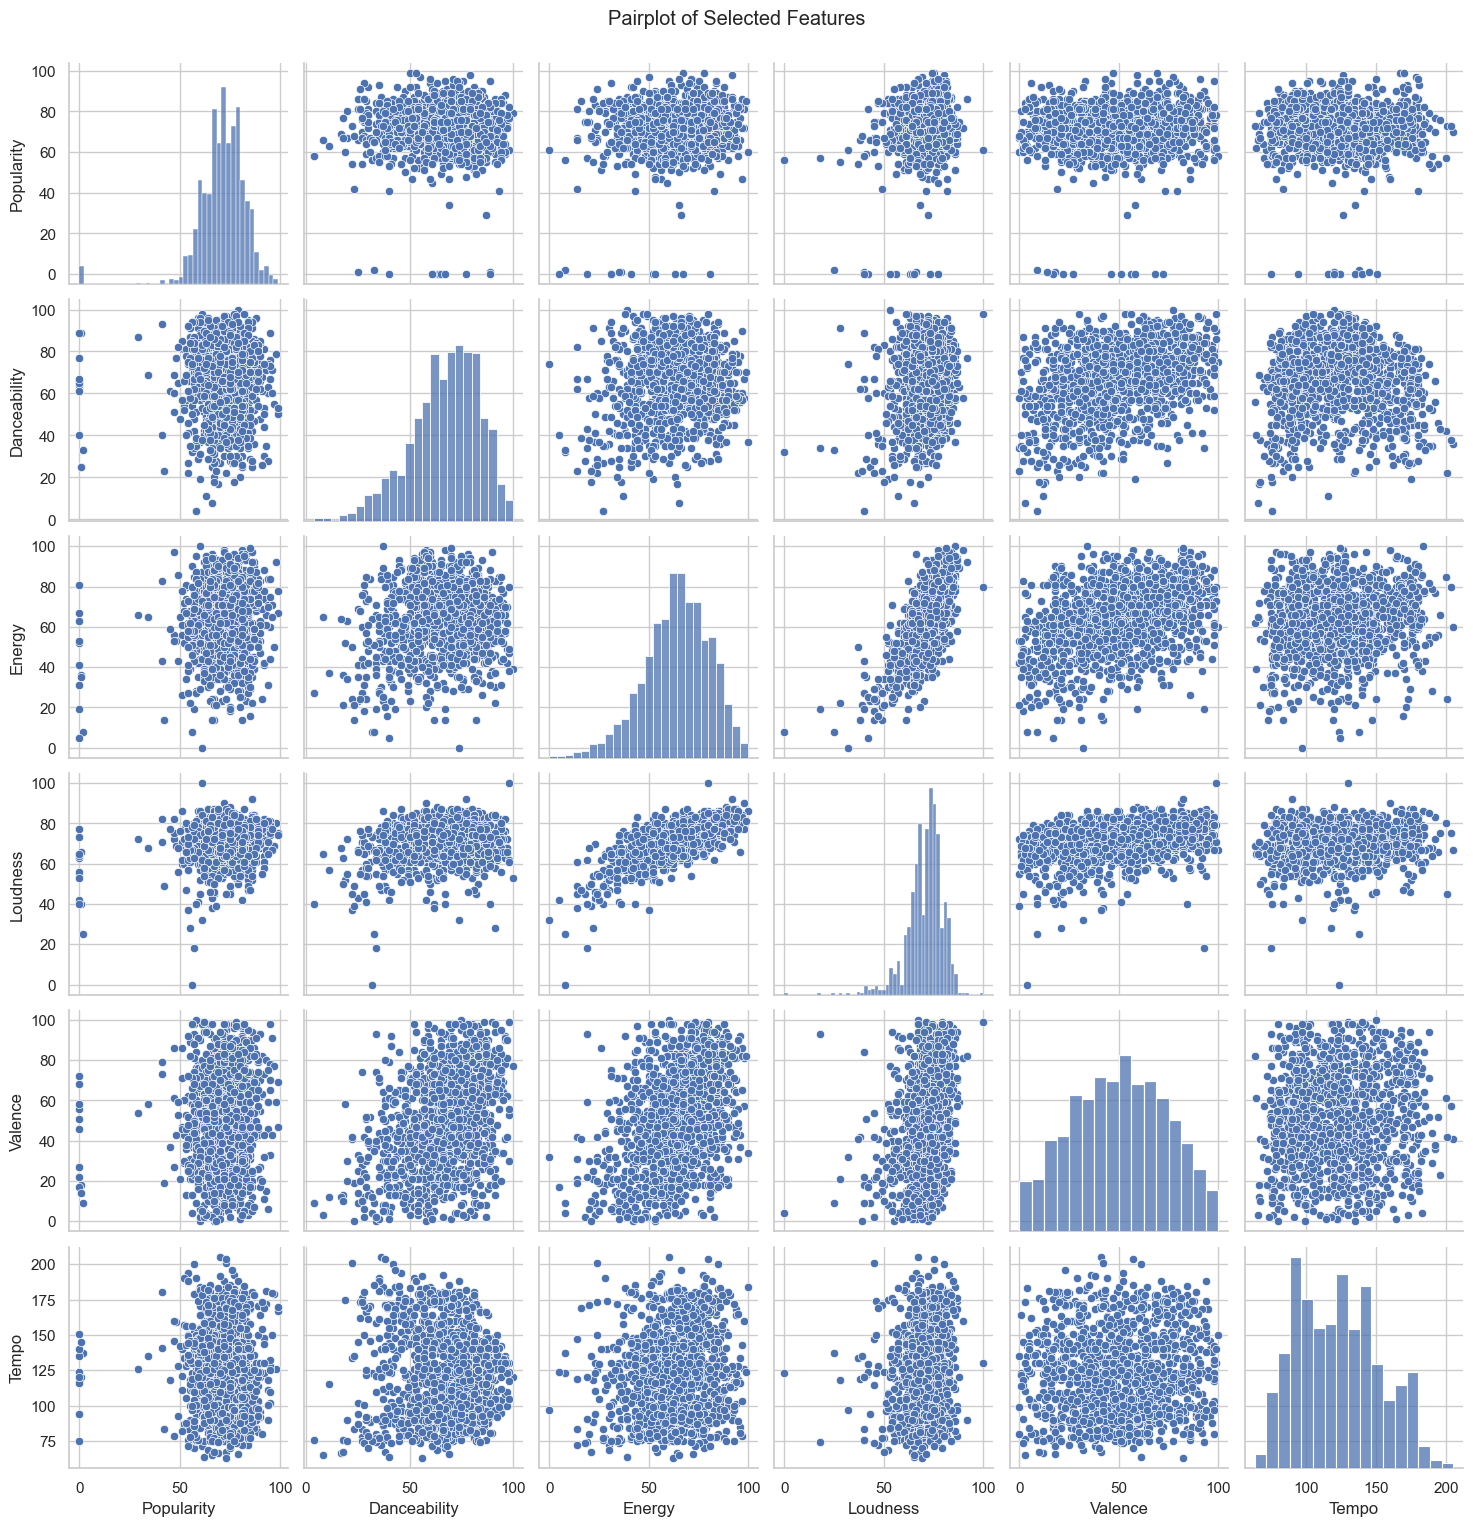

In [60]:
# Create a pairplot for selected features to see their relationships
selected_features = ['Popularity', 'Danceability', 'Energy', 'Loudness', 'Valence', 'Tempo']
sns.pairplot(data[selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)  # Adjust title position
plt.show()

Insights from Pairplot
Popularity shows some level of relationship with features like Loudness and Energy, suggesting that louder and more energetic tracks tend to be more popular.
Danceability and Valence also show a pattern, where more danceable tracks tend to have higher valence, indicating they are generally more upbeat and positive.

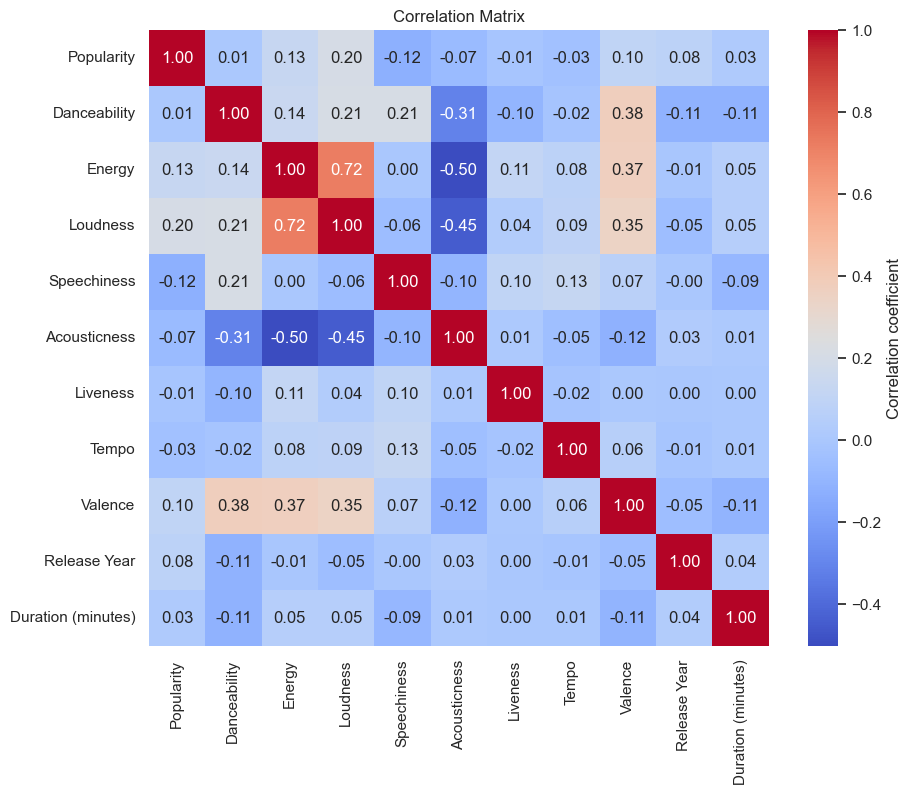

In [61]:
# Create a correlation heatmap for numerical features
correlation_matrix = data[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix')
plt.show()

Genre vs Other Features

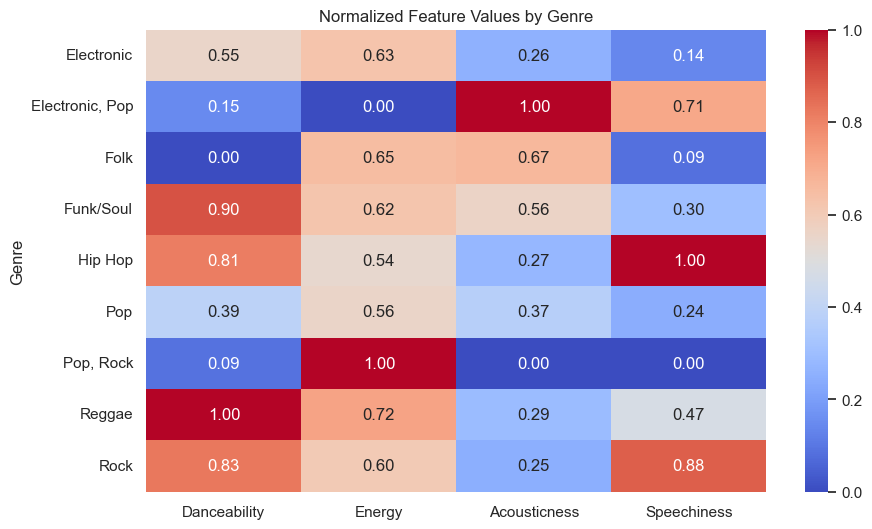

In [62]:
import numpy as np

# Calculate the mean of selected features grouped by genre
genre_features = data.groupby('Genre').agg({'Danceability': 'mean', 'Energy': 'mean', 'Acousticness': 'mean', 'Speechiness': 'mean'}).reset_index()

# Normalize the features
for col in genre_features.columns[1:]:
    genre_features[col] = (genre_features[col] - genre_features[col].min()) / (genre_features[col].max() - genre_features[col].min())

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(genre_features.set_index('Genre'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Normalized Feature Values by Genre')
plt.show()


Interpretation
This visualization helps understand which features are dominant in each genre. For example, acoustic genres might have high acousticness but low energy, helping identify genre-specific trends and characteristics.

Tempo vs Energy

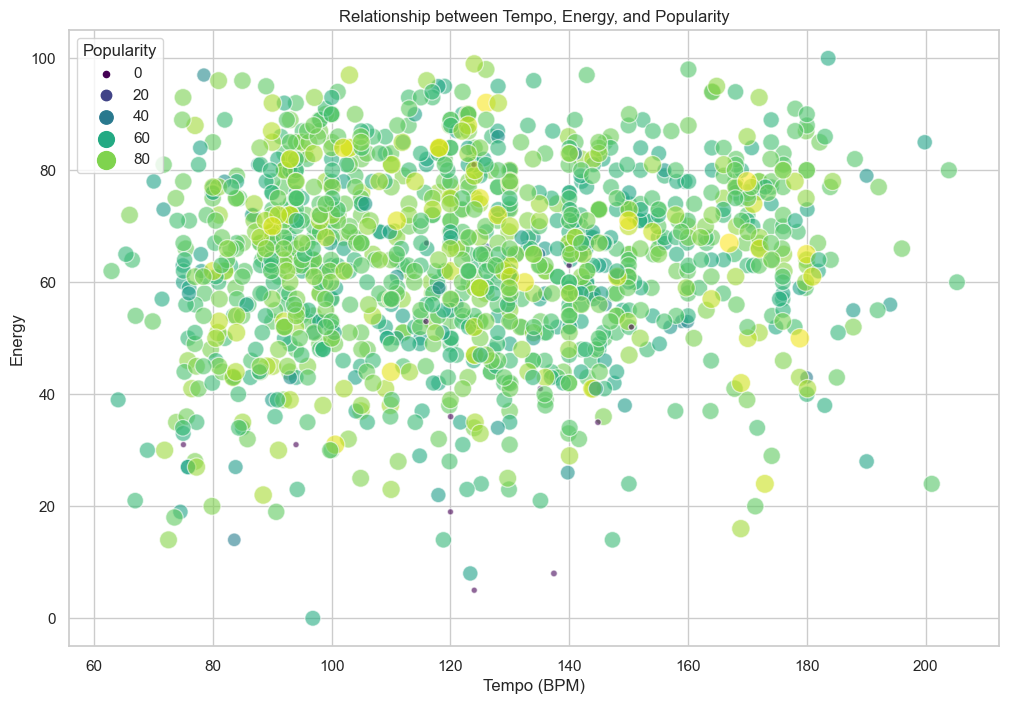

In [64]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Tempo', y='Energy', hue='Popularity', data=data, palette='viridis', size='Popularity', sizes=(20, 200), alpha=0.6)
plt.title('Relationship between Tempo, Energy, and Popularity')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Energy')
plt.show()


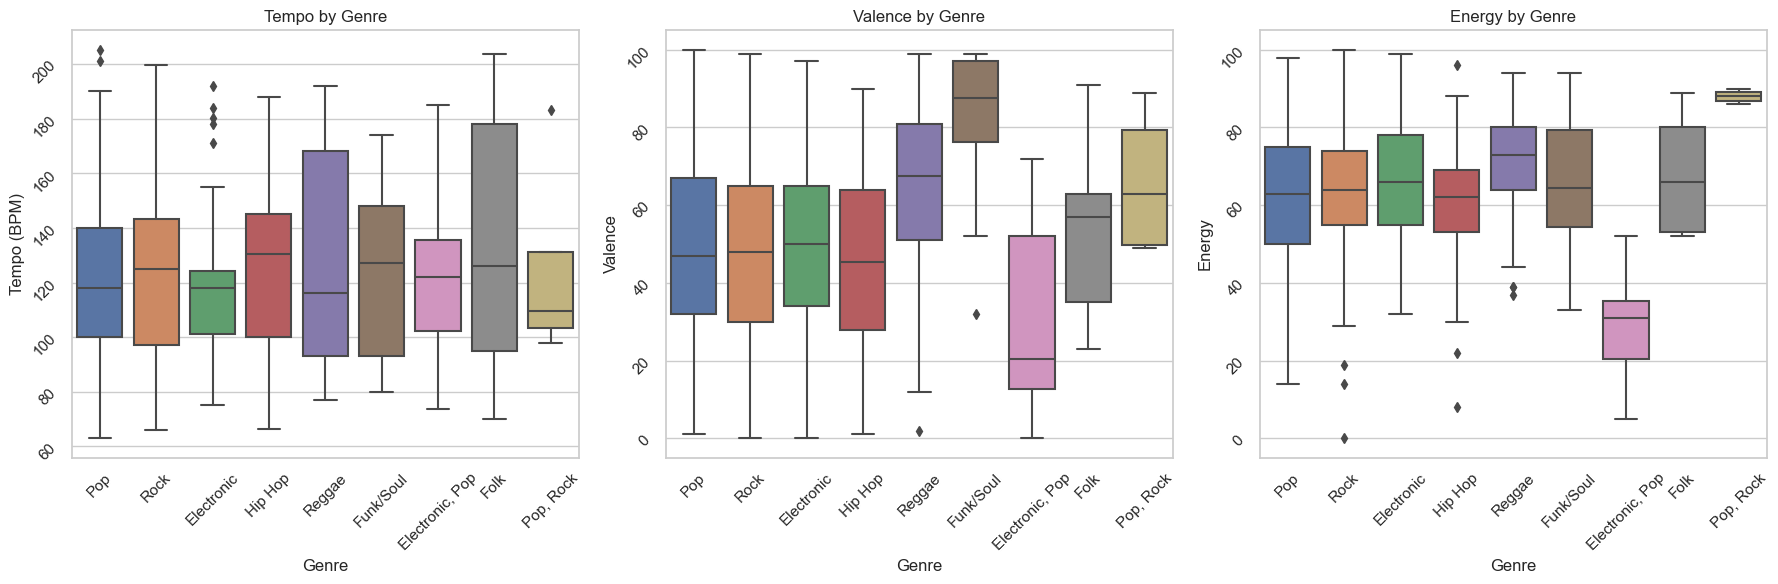

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for Tempo by Genre
sns.boxplot(ax=axes[0], x='Genre', y='Tempo', data=data)
axes[0].set_title('Tempo by Genre')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Tempo (BPM)')
axes[0].tick_params(labelrotation=45)

# Box plot for Valence by Genre
sns.boxplot(ax=axes[1], x='Genre', y='Valence', data=data)
axes[1].set_title('Valence by Genre')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Valence')
axes[1].tick_params(labelrotation=45)

# Box plot for Energy by Genre
sns.boxplot(ax=axes[2], x='Genre', y='Energy', data=data)
axes[2].set_title('Energy by Genre')
axes[2].set_xlabel('Genre')
axes[2].set_ylabel('Energy')
axes[2].tick_params(labelrotation=45)

plt.tight_layout()
plt.show()

Advanced Heatmap for better clarity

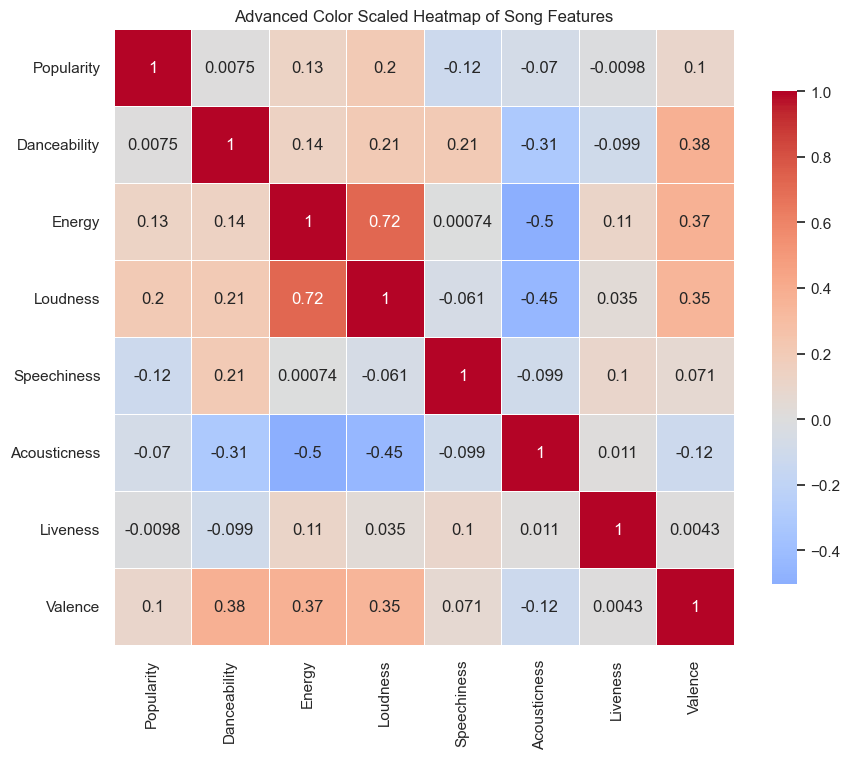

In [67]:
# Compute the correlation matrix
corr = data[['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Valence']].corr()

# Create a heatmap with advanced color scaling
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Advanced Color Scaled Heatmap of Song Features')
plt.show()


CLUSTERING

In [110]:
from sklearn.preprocessing import StandardScaler

# Selecting the predictor attributes
features = df[['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (minutes)', 'Valence']]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [111]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [112]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from kneed import KneeLocator

c:\Users\workl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\workl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\workl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\workl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

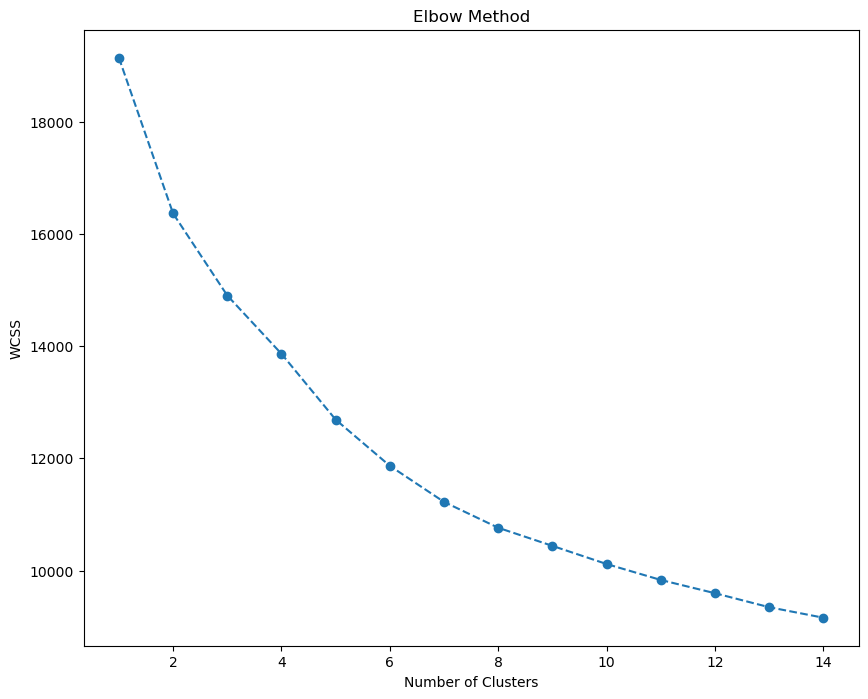

Optimal number of clusters: 6


c:\Users\workl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\workl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Silhouette Score: 0.13
Davies-Bouldin Score: 1.76


In [113]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from kneed import KneeLocator

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Determine the elbow point using KneeLocator
n_clusters = KneeLocator(range(1, 15), wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters:", n_clusters)

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
labels = kmeans.fit_predict(features_scaled)

# Evaluate clustering performance
silhouette_avg = silhouette_score(features_scaled, labels)
db_score = davies_bouldin_score(features_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Score: {db_score:.2f}")

# Save the cluster labels
df['Cluster_Labels'] = labels

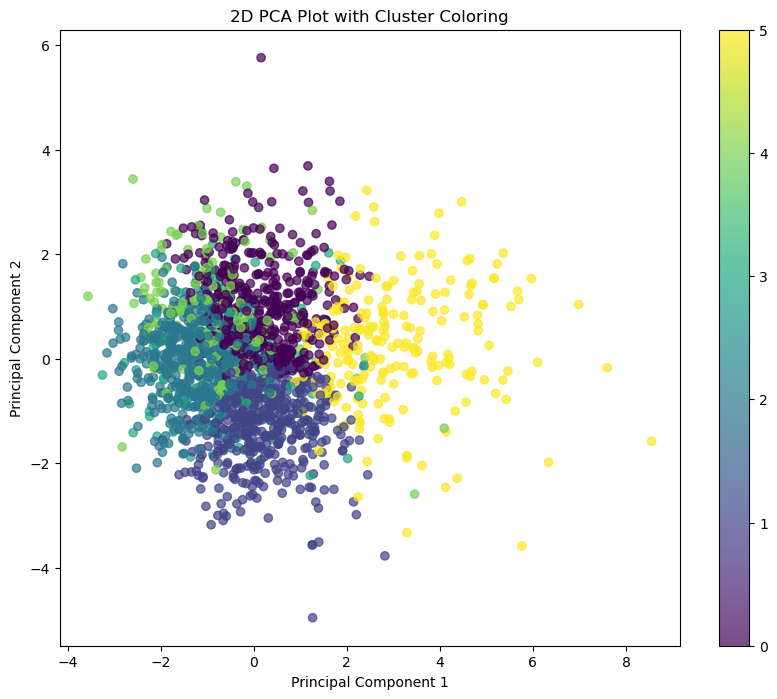

In [114]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Plot with Cluster Coloring')
plt.colorbar()
plt.show()

In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [117]:
from sklearn.linear_model import LogisticRegression # 1
from sklearn.neighbors import KNeighborsClassifier # 2
from sklearn.ensemble import RandomForestClassifier # 3

In [118]:
genre_cluster_matrix = pd.crosstab(df['Genre'], df['Cluster_Labels'])
print(genre_cluster_matrix)

Cluster_Labels     0    1    2   3   4    5
Genre                                      
Dance              6    1    3   3   2    1
Electronic, Pop    0    1    0   3   1   11
Folk               4    0    3   0   1    3
Funk/Soul          1    6    8   0   0    4
Hip Hop           57   92   76  30  28   11
Latin              8    6   19   0   0    1
Pop              193   71  174  76  47  116
Pop, Rock          2    0    2   0   0    0
R&B                1    2    0   0   0    0
Reggae            17   30   92   0   5    7
Rock             153  265  133   8  66   64


In [119]:
df

,Song Name,Artist,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Duration (minutes),Release Year,Index,Cluster_Labels
1338,I Could Be The One (Avicii Vs. Nicky Romero) -...,Avicii,Pop,76.0,42.0,79.0,86.0,3.0,35.0,35.0,127.946,65.0,3.47,2012,1,2
1274,Faded,Tyga,Hip Hop,65.0,83.0,66.0,62.0,33.0,1.0,40.0,95.073,32.0,3.44,2012,2,1
1273,R.I.P. (feat. Tinie Tempah),Rita Ora,Hip Hop,52.0,54.0,83.0,88.0,5.0,3.0,76.0,72.022,34.0,3.80,2012,3,4
1272,As Long As You Love Me,Justin Bieber,Pop,75.0,50.0,88.0,88.0,15.0,9.0,41.0,139.691,62.0,3.82,2012,4,4
1271,Candy,Robbie Williams,Pop,76.0,68.0,79.0,72.0,4.0,4.0,6.0,116.043,91.0,3.35,2012,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,p u n c h i n ‘ . t h e . c l o c k,J. Cole,Rock,70.0,75.0,75.0,70.0,41.0,20.0,16.0,94.104,70.0,1.88,2021,1910,1
260,t h e . c l i m b . b a c k,J. Cole,Rock,70.0,56.0,63.0,68.0,38.0,5.0,36.0,81.446,30.0,5.10,2021,1911,0
261,h u n g e r . o n . h i l l s i d e (with Bas),J. Cole,Rock,71.0,50.0,71.0,73.0,5.0,13.0,21.0,94.983,28.0,3.98,2021,1912,0
252,Ramen & OJ,"Joyner Lucas, Lil Baby",Rock,81.0,54.0,56.0,71.0,31.0,50.0,8.0,106.196,14.0,3.64,2021,1913,5


In [120]:
selected_columns = ['Index', 'Song Name', 'Artist', 'Genre']
noun_df = df[selected_columns].copy()
noun_df

,Index,Song Name,Artist,Genre
1338,1,I Could Be The One (Avicii Vs. Nicky Romero) -...,Avicii,Pop
1274,2,Faded,Tyga,Hip Hop
1273,3,R.I.P. (feat. Tinie Tempah),Rita Ora,Hip Hop
1272,4,As Long As You Love Me,Justin Bieber,Pop
1271,5,Candy,Robbie Williams,Pop
...,...,...,...,...
259,1910,p u n c h i n ‘ . t h e . c l o c k,J. Cole,Rock
260,1911,t h e . c l i m b . b a c k,J. Cole,Rock
261,1912,h u n g e r . o n . h i l l s i d e (with Bas),J. Cole,Rock
252,1913,Ramen & OJ,"Joyner Lucas, Lil Baby",Rock


In [121]:
cluster_df = df.drop(columns=selected_columns).copy()
cluster_df

,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Duration (minutes),Release Year,Cluster_Labels
1338,76.0,42.0,79.0,86.0,3.0,35.0,35.0,127.946,65.0,3.47,2012,2
1274,65.0,83.0,66.0,62.0,33.0,1.0,40.0,95.073,32.0,3.44,2012,1
1273,52.0,54.0,83.0,88.0,5.0,3.0,76.0,72.022,34.0,3.80,2012,4
1272,75.0,50.0,88.0,88.0,15.0,9.0,41.0,139.691,62.0,3.82,2012,4
1271,76.0,68.0,79.0,72.0,4.0,4.0,6.0,116.043,91.0,3.35,2012,2
...,...,...,...,...,...,...,...,...,...,...,...,...
259,70.0,75.0,75.0,70.0,41.0,20.0,16.0,94.104,70.0,1.88,2021,1
260,70.0,56.0,63.0,68.0,38.0,5.0,36.0,81.446,30.0,5.10,2021,0
261,71.0,50.0,71.0,73.0,5.0,13.0,21.0,94.983,28.0,3.98,2021,0
252,81.0,54.0,56.0,71.0,31.0,50.0,8.0,106.196,14.0,3.64,2021,5


In [122]:
df= cluster_df

In [123]:
df['Cluster_Labels'].value_counts()

Cluster_Labels
2    510
1    474
0    442
5    218
4    150
3    120
Name: count, dtype: int64

In [124]:
# define feature variable
X = df.drop("Cluster_Labels", axis=1)
X.sample(5)

,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Duration (minutes),Release Year
266,83.0,50.0,23.0,70.0,1.0,85.0,7.0,110.011,3.0,4.00,2019
1396,64.0,35.0,96.0,88.0,2.0,2.0,4.0,148.000,91.0,3.48,2012
1692,75.0,76.0,58.0,68.0,6.0,0.0,28.0,129.988,34.0,3.88,2016
1214,81.0,62.0,88.0,90.0,4.0,6.0,29.0,129.884,55.0,3.25,2012
584,81.0,67.0,14.0,61.0,2.0,88.0,6.0,72.541,31.0,2.60,2020


In [125]:
y = np.array(df["Cluster_Labels"])
y

array([2, 1, 4, ..., 0, 5, 0])

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

Logistic Regression

In [127]:
pipeline_lr = Pipeline(
    [
        ("scalar1", StandardScaler()),
        ("lr_clf", LogisticRegression(solver='saga',random_state=0,multi_class='multinomial',max_iter=1000,tol=10e-3)),
    ]
)

In [128]:
pipeline_lr.fit(X_train, y_train)
y_test_pred_lr = pipeline_lr.predict(X_test)
print('Actual label:    ', y_test[:20])
print('Predicted label: ', y_test_pred_lr[:20])

Actual label:     [1 0 2 0 0 5 1 4 2 2 5 2 5 2 3 0 2 5 4 0]
Predicted label:  [1 0 2 0 0 5 1 1 2 2 5 2 5 2 3 0 2 5 4 0]


In [130]:
# module for classification report
from sklearn.metrics import classification_report
# print out classification report
target_names = ['cluster 0', 'cluster 1', 'cluster 2','cluster 3', 'cluster 4', 'cluster 5']
print(classification_report(y_test, y_test_pred_lr, target_names=target_names))

              precision    recall  f1-score   support

   cluster 0       0.99      0.96      0.98        85
   cluster 1       0.96      0.99      0.97        98
   cluster 2       0.98      0.99      0.98        99
   cluster 3       1.00      1.00      1.00        29
   cluster 4       0.97      0.88      0.92        32
   cluster 5       0.98      1.00      0.99        40

    accuracy                           0.98       383
   macro avg       0.98      0.97      0.97       383
weighted avg       0.98      0.98      0.98       383



In [131]:
report_1 = classification_report(y_test, y_test_pred_lr, target_names=target_names,output_dict=True)
df_r_logistic = pd.DataFrame(report_1).transpose()
df_r_logistic.head()

,precision,recall,f1-score,support
cluster 0,0.987952,0.964706,0.976190,85.0
cluster 1,0.960396,0.989796,0.974874,98.0
cluster 2,0.980000,0.989899,0.984925,99.0
cluster 3,1.000000,1.000000,1.000000,29.0
cluster 4,0.965517,0.875000,0.918033,32.0


<Figure size 2000x1200 with 0 Axes>

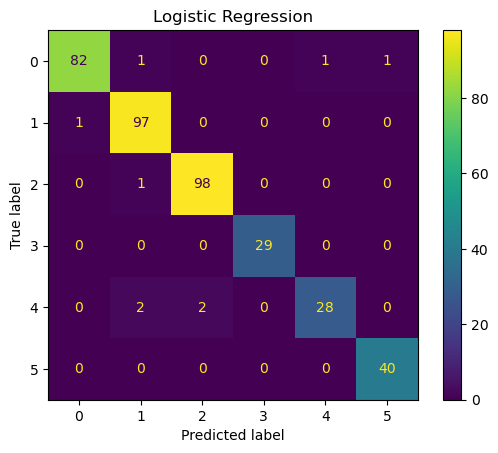

In [132]:
cm = confusion_matrix(y_test, y_test_pred_lr)

# plot confusion matrix of logistic regression
plt.figure(figsize=(20,12))
cm = confusion_matrix(y_test, y_test_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Logistic Regression")
plt.show()

In [133]:
y_test_proba_lr = pipeline_lr.predict_proba(X_test)

# roc auc score using one versus rest and macro average
LR_auc = roc_auc_score(y_test, y_test_proba_lr, multi_class='ovr', average='macro')
f"The average AUC for the logistic regression model is {LR_auc:0.3f}"

'The average AUC for the logistic regression model is 0.999'

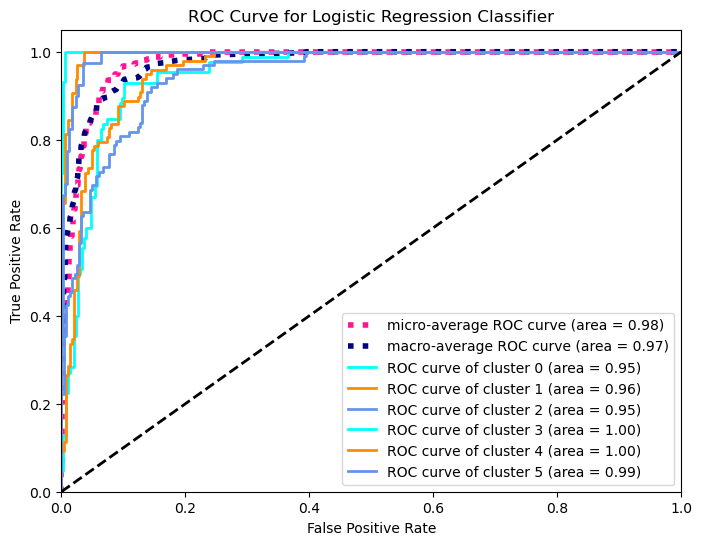

In [135]:
# Plot ROC Curves for Logistic Regression
from sklearn.preprocessing import label_binarize
from itertools import cycle
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4,5])

n_classes = 6
lw=2

y_score = pipeline_lr.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plot ROC for a specific class
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,6))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of cluster {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression Classifier")
plt.legend(loc="lower right")
plt.show()

In [136]:
# f1 score
from sklearn.metrics import f1_score
LR_f1 = f1_score(y_test, y_test_pred_lr, average='macro')
f"The baseline F1(macro) socre of the logistic regression model on the test data is {LR_f1:0.3f}"

'The baseline F1(macro) socre of the logistic regression model on the test data is 0.974'

Random Forest

In [137]:
rf_clf = RandomForestClassifier(random_state=0)

In [138]:
rf_clf.fit(X_train, y_train)
# make prediction on test data
y_test_pred_rf = rf_clf.predict(X_test)
# check first 20 ground truths and prediction
print('Actual label:    ', y_test[:20])
print('Predicted label: ', y_test_pred_rf[:20])

Actual label:     [1 0 2 0 0 5 1 4 2 2 5 2 5 2 3 0 2 5 4 0]
Predicted label:  [1 0 2 0 0 5 1 1 2 2 5 0 5 2 1 0 2 5 1 1]


In [139]:
# print classification report
target_names = ['cluster 0', 'cluster 1', 'cluster 2','cluster 3', 'cluster 4','cluster 5']
print(classification_report(y_test, y_test_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

   cluster 0       0.92      0.91      0.91        85
   cluster 1       0.89      0.90      0.89        98
   cluster 2       0.90      0.96      0.93        99
   cluster 3       1.00      0.86      0.93        29
   cluster 4       0.96      0.69      0.80        32
   cluster 5       0.83      0.97      0.90        40

    accuracy                           0.90       383
   macro avg       0.92      0.88      0.89       383
weighted avg       0.91      0.90      0.90       383



In [140]:
# classification report
report_2 = classification_report(y_test, y_test_pred_rf, target_names=target_names,output_dict=True)
df_r_rf = pd.DataFrame(report_2).transpose()
df_r_rf.head()

,precision,recall,f1-score,support
cluster 0,0.916667,0.905882,0.911243,85.0
cluster 1,0.888889,0.897959,0.893401,98.0
cluster 2,0.904762,0.959596,0.931373,99.0
cluster 3,1.000000,0.862069,0.925926,29.0
cluster 4,0.956522,0.687500,0.800000,32.0


<Figure size 2000x1200 with 0 Axes>

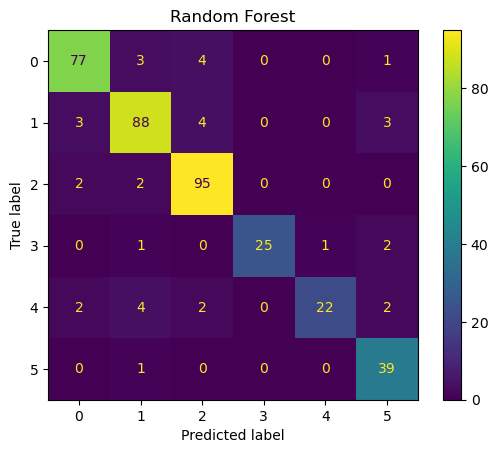

In [141]:
plt.figure(figsize=(20,12))
cm = confusion_matrix(y_test, y_test_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Random Forest")
plt.show()

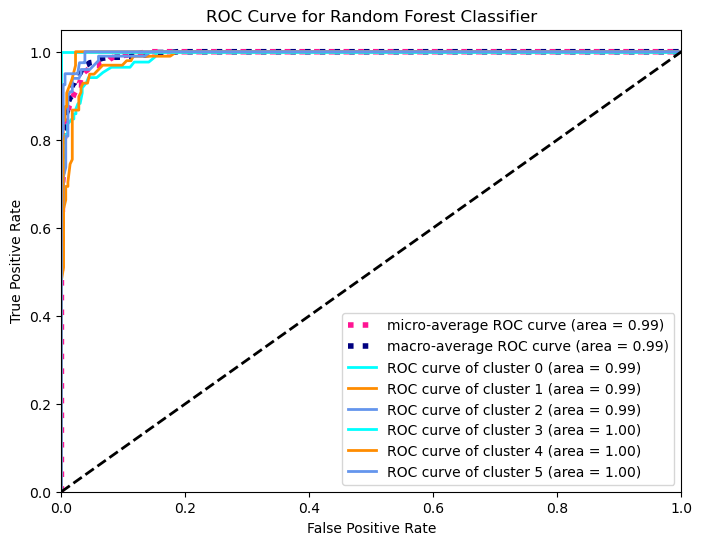

In [142]:
# Plot ROC for Random Forest Classifier
y_score = rf_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plot ROC for a specific class
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,6))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of cluster {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Classifier")
plt.legend(loc="lower right")
plt.show()

In [143]:
RF_f1 = f1_score(y_test, y_test_pred_rf, average='macro')
f"The F1(macro) socre of the random forest model on the validation data is {RF_f1:0.3f}"

'The F1(macro) socre of the random forest model on the validation data is 0.893'

Actual label:     [1 0 2 0 0 5 1 4 2 2 5 2 5 2 3 0 2 5 4 0]
Predicted label:  [1 0 2 0 0 5 1 1 2 2 5 0 5 2 1 0 2 5 2 1]
              precision    recall  f1-score   support

   cluster 0       0.95      0.94      0.95        85
   cluster 1       0.87      0.91      0.89        98
   cluster 2       0.91      0.95      0.93        99
   cluster 3       1.00      0.97      0.98        29
   cluster 4       1.00      0.78      0.88        32
   cluster 5       0.93      0.95      0.94        40

    accuracy                           0.92       383
   macro avg       0.94      0.92      0.93       383
weighted avg       0.93      0.92      0.92       383



<Figure size 2000x1200 with 0 Axes>

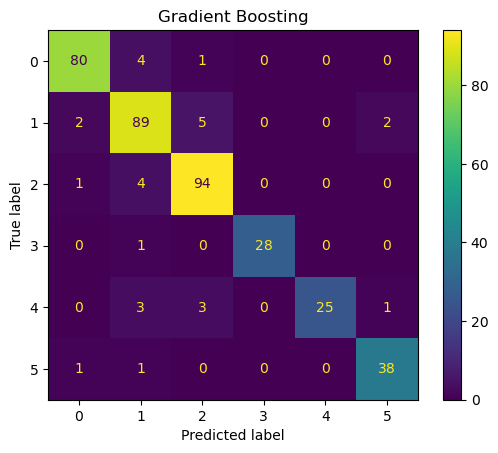

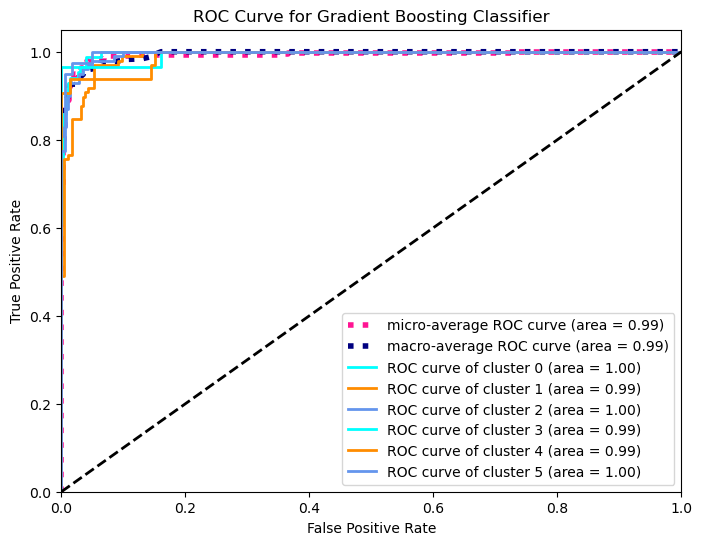

'The F1(macro) score of the gradient boosting model on the test data is 0.928'

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
# instantiate a class for gradient boosting classifier
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
# make prediction on test data
y_test_pred_gb = gb_clf.predict(X_test)
# check first 20 ground truths and prediction
print('Actual label:    ', y_test[:20])
print('Predicted label: ', y_test_pred_gb[:20])

# print classification report
target_names = ['cluster 0', 'cluster 1', 'cluster 2','cluster 3', 'cluster 4','cluster 5']
print(classification_report(y_test, y_test_pred_gb, target_names=target_names))

# plot confusion matrix of gradient boosting model
plt.figure(figsize=(20,12))
cm_gb = confusion_matrix(y_test, y_test_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp_gb.plot()
plt.title("Gradient Boosting")
plt.show()

# Plot ROC for Gradient Boosting Classifier
y_score_gb = gb_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_gb = dict()
tpr_gb = dict()
roc_auc_gb = dict()
for i in range(n_classes):
    fpr_gb[i], tpr_gb[i], _ = roc_curve(y_test_bin[:, i], y_score_gb[:, i])
    roc_auc_gb[i] = auc(fpr_gb[i], tpr_gb[i])

# Compute micro-average ROC curve and ROC area
fpr_gb["micro"], tpr_gb["micro"], _ = roc_curve(y_test_bin.ravel(), y_score_gb.ravel())
roc_auc_gb["micro"] = auc(fpr_gb["micro"], tpr_gb["micro"])

# plot ROC for a specific class
# First aggregate all false positive rates
all_fpr_gb = np.unique(np.concatenate([fpr_gb[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_gb = np.zeros_like(all_fpr_gb)
for i in range(n_classes):
    mean_tpr_gb += np.interp(all_fpr_gb, fpr_gb[i], tpr_gb[i])

# Finally average it and compute AUC
mean_tpr_gb /= n_classes

fpr_gb["macro"] = all_fpr_gb
tpr_gb["macro"] = mean_tpr_gb
roc_auc_gb["macro"] = auc(fpr_gb["macro"], tpr_gb["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,6))
plt.plot(
    fpr_gb["micro"],
    tpr_gb["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc_gb["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_gb["macro"],
    tpr_gb["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc_gb["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr_gb[i],
        tpr_gb[i],
        color=color,
        lw=lw,
        label="ROC curve of cluster {0} (area = {1:0.2f})".format(i, roc_auc_gb[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradient Boosting Classifier")
plt.legend(loc="lower right")
plt.show()
GB_f1 = f1_score(y_test, y_test_pred_gb, average='macro')
f"The F1(macro) score of the gradient boosting model on the test data is {GB_f1:0.3f}"

KNN

Actual label:     [1 0 2 0 0 5 1 4 2 2 5 2 5 2 3 0 2 5 4 0]
Predicted label:  [1 0 2 0 0 5 1 1 2 2 5 2 5 2 2 0 2 5 4 0]
              precision    recall  f1-score   support

   cluster 0       0.83      0.88      0.86        85
   cluster 1       0.79      0.79      0.79        98
   cluster 2       0.82      0.91      0.86        99
   cluster 3       1.00      0.93      0.96        29
   cluster 4       0.95      0.56      0.71        32
   cluster 5       0.95      0.95      0.95        40

    accuracy                           0.85       383
   macro avg       0.89      0.84      0.85       383
weighted avg       0.85      0.85      0.85       383



<Figure size 2000x1200 with 0 Axes>

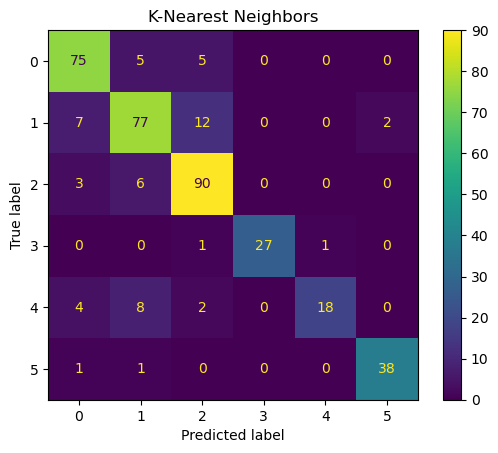

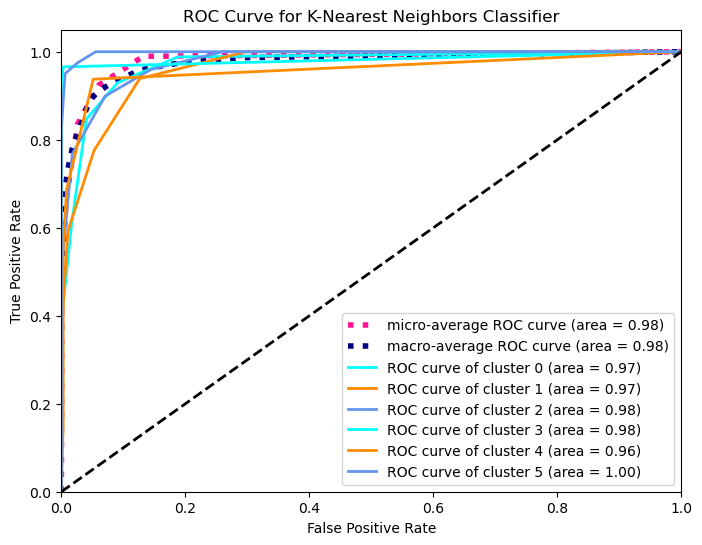

'The F1(macro) score of the K-Nearest Neighbors model on the test data is 0.855'

In [145]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate a class for KNN classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# make prediction on test data
y_test_pred_knn = knn_clf.predict(X_test)

# check first 20 ground truths and predictions
print('Actual label:    ', y_test[:20])
print('Predicted label: ', y_test_pred_knn[:20])

# print classification report
target_names = ['cluster 0', 'cluster 1', 'cluster 2','cluster 3', 'cluster 4','cluster 5']
print(classification_report(y_test, y_test_pred_knn, target_names=target_names))

# plot confusion matrix of KNN model
plt.figure(figsize=(20,12))
cm_knn = confusion_matrix(y_test, y_test_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title("K-Nearest Neighbors")
plt.show()

# Plot ROC for KNN Classifier
y_score_knn = knn_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], y_score_knn[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

# Compute micro-average ROC curve and ROC area
fpr_knn["micro"], tpr_knn["micro"], _ = roc_curve(y_test_bin.ravel(), y_score_knn.ravel())
roc_auc_knn["micro"] = auc(fpr_knn["micro"], tpr_knn["micro"])

# plot ROC for a specific class
# First aggregate all false positive rates
all_fpr_knn = np.unique(np.concatenate([fpr_knn[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_knn = np.zeros_like(all_fpr_knn)
for i in range(n_classes):
    mean_tpr_knn += np.interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])

# Finally average it and compute AUC
mean_tpr_knn /= n_classes

fpr_knn["macro"] = all_fpr_knn
tpr_knn["macro"] = mean_tpr_knn
roc_auc_knn["macro"] = auc(fpr_knn["macro"], tpr_knn["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,6))
plt.plot(
    fpr_knn["micro"],
    tpr_knn["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc_knn["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_knn["macro"],
    tpr_knn["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc_knn["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr_knn[i],
        tpr_knn[i],
        color=color,
        lw=lw,
        label="ROC curve of cluster {0} (area = {1:0.2f})".format(i, roc_auc_knn[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for K-Nearest Neighbors Classifier")
plt.legend(loc="lower right")
plt.show()

KNN_f1 = f1_score(y_test, y_test_pred_knn, average='macro')
f"The F1(macro) score of the K-Nearest Neighbors model on the test data is {KNN_f1:0.3f}"


In [146]:
from sklearn import metrics

In [147]:
acLR = round(metrics.accuracy_score(y_test, y_test_pred_lr),2)

acRF = round(metrics.accuracy_score(y_test, y_test_pred_rf),2)

acGB = round(metrics.accuracy_score(y_test, y_test_pred_gb),2)

acKNN = round(metrics.accuracy_score(y_test, y_test_pred_knn),2)

acScore = [acLR, acRF, acGB, acKNN]

In [148]:
prLR = round(metrics.precision_score(y_test, y_test_pred_lr,average='weighted'), 2)
prRF = round(metrics.precision_score(y_test, y_test_pred_rf, average='weighted'), 2)
prGB = round(metrics.precision_score(y_test, y_test_pred_gb, average='weighted'), 2)
prKNN = round(metrics.precision_score(y_test, y_test_pred_knn, average='weighted'), 2)

prScore = [prLR, prRF, prGB, prKNN]

In [149]:
f1LR = round(metrics.f1_score(y_test, y_test_pred_lr,average='weighted'), 2)
f1RF = round(metrics.f1_score(y_test, y_test_pred_rf,average='weighted'), 2)
f1GB = round(metrics.f1_score(y_test, y_test_pred_gb,average='weighted'), 2)
f1KNN = round(metrics.f1_score(y_test, y_test_pred_knn,average='weighted'), 2)

f1Score = [f1LR, f1RF, f1GB, f1KNN]

In [150]:
df = pd.DataFrame(
    list(zip(
        ['LR', 'RF', 'GB', 'KNN'],acScore , prScore, f1Score)),
    columns = ['Model', 'Accuracy','Precision','F1-Score']
)

df = pd.DataFrame.from_dict(df)

print(df)

  Model  Accuracy  Precision  F1-Score
0    LR      0.98       0.98      0.98
1    RF      0.90       0.91      0.90
2    GB      0.92       0.93      0.92
3   KNN      0.85       0.85      0.85


In [151]:
from sklearn.metrics import jaccard_score

In [152]:
jcLR = round(jaccard_score(y_test, y_test_pred_lr,average='weighted'),2)

jcRF = round(jaccard_score(y_test, y_test_pred_rf,average='weighted'),2)

jcGB = round(jaccard_score(y_test, y_test_pred_gb,average='weighted'),2)

jcKNN = round(jaccard_score(y_test, y_test_pred_knn,average='weighted'),2)

list_jaccard_similarity  = [jcLR, jcRF, jcGB, jcKNN]

In [153]:
df = pd.DataFrame(
    list(zip(
        ['LR', 'RF', 'GB', 'KNN'],list_jaccard_similarity)),
    columns = ['Model', 'Jaccard']
)

df = pd.DataFrame.from_dict(df)

print(df)

  Model  Jaccard
0    LR     0.95
1    RF     0.82
2    GB     0.86
3   KNN     0.74


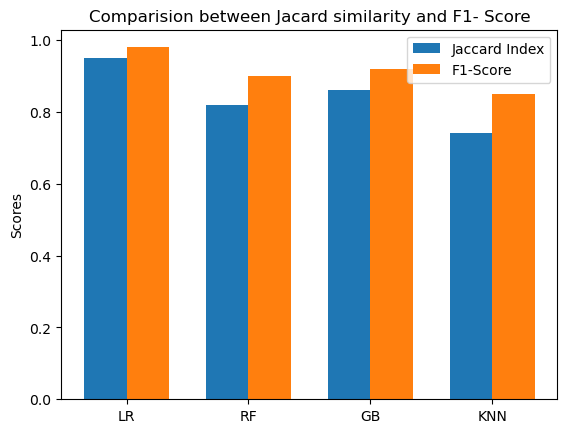

In [154]:
import matplotlib.pyplot as plot

ind = np.arange(4) 
width = 0.35       
plot.bar(ind, list_jaccard_similarity, width, label='Jaccard Index')
plot.bar(ind + width,  f1Score, width,
    label='F1-Score')

plot.ylabel('Scores')
plot.title('Comparision between Jacard similarity and F1- Score')

plot.xticks(ind + width / 2, ('LR', 'RF', 'GB', 'KNN'))
plot.legend(loc='best')
plot.show()

Highest Jaccard Similarity = Logistic Regression

Highest F1-score = Logistic Regression

In [155]:
X_predict = list(pipeline_lr.predict(X_test))
predicted_df = {'predicted_values': X_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(25)

,predicted_values,original_values
0,1,1
1,0,0
2,2,2
3,0,0
4,0,0
5,5,5
6,1,1
7,1,4
8,2,2
9,2,2


In [156]:
pd.DataFrame(predicted_df)['predicted_values'].value_counts()

predicted_values
1    101
2    100
0     83
5     41
3     29
4     29
Name: count, dtype: int64

In [157]:
pd.DataFrame(predicted_df)['original_values'].value_counts()

original_values
2    99
1    98
0    85
5    40
4    32
3    29
Name: count, dtype: int64